# Project 2: Ames Housing Data and Kaggle Challenge

# Ames Housing Sale Price prediction

## Background
For our second project, we are going to take a look at the Ames Housing Data and submit our sale price prediction in [Kaggle](https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge).  

## Problem Statement


### Kaggle Challenge

As mentioned in the background, the goal of this project is to predict the sales price for each house. For each Id in the test set, we needs to predict the value of the `SalePrice` variable.

The challenge evaluation is determined by [Root Mean Squared Error](https://en.wikipedia.org/wiki/Root-mean-square_deviation) (RMSE).

There was no problem statement included in the Kaggle Challenge, hence we had developed the following Problem Statement to give a context to this project.

### Problem Statement developed
A real estate firm is looking to invest in Housing in Ames, Iowa and has obtained the selling price of some given homes from 2006 to 2010. However, some of the houses do not have sale price to compare against.

As data scientist working for the real estate firm, we were tasked to develop a model to predict the selling price of a given home in Ames, Iowa from 2006 to 2010, and predict the missing Sale Price in our dataset.

Our employer hopes to use this information to help assess whether the asking price of a house is higher or lower than the true value of the house. If the house is undervalued, it may be a good investment for the firm.

After investing, our employer would also like to find out what features drives the price of a house located in Ames, Iowa as potential redevelopment possibilities to increase the sale price.

__Summary of problem statement__<br>
- To explore and analyse the dataset to develop a model (with lowest RMSE) that predicts the housing sale price in Ames, Iowa.
- Using the model built, identify the top 3 features that will increase the sale price and identify 3 features that will lead to a decrease in the sale price.

## Report
This report is prepared for our management as we report back on the task assigned to us. 

1. [Data_Cleaning_and_EDA.ipynb](./Data_Cleaning_and_EDA.ipynb): Data Cleaning and Exploratory Data Analysis of the given data
2. [ames_housing_saleprice_prediction.ipynb](./ames_housing_saleprice_prediction.ipynb) (current): Preprocessing, Modeling and Prediction. Overall Conclusion and Recommendation. 

## Contents:
- [Initialising notebook](#Initialising-notebook)
    - [Libraries](#Libraries)
- [Data Import](#Data-Import)
    - [Data Dictionary](#Data-Dictionary)
    - [Data Extraction](#Data-Extraction)
- [Preprocessing and Feature Engineering](#Preprocessing-and-Feature-Engineering)
    - [Perform Feature Engineering for features - Continuous Features](#Perform-Feature-Engineering-for-features---Continuous-Features)
    - [One-hot encoding - categorical features](#One-hot-encoding---categorical-features)
- [Modeling](#Modeling)
    - [Prepare data for modeling](#Prepare-data-for-modeling)
    - [Scale data](#Scale-data)
    - [Hyperparameter Tuning](#Hyperparameter-Tuning)
    - [Cross Validation](#Cross-Validation)
    - [Model Evaluation](#Model-Evaluation)
- [Conclusion](#Conclusion)
    - [Kaggle Submission](#Kaggle-Submission)
    - [Optimal Model](#Optimal-Model)
- [Recommendation](#Recommendation)

## Initialising notebook

In this section, we will list down the libraries and functions used in this notebook.

### Libraries
We will import the libraries that are used in this notebook.

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for linear regression, Ridge, Lasso, ElasticNet and train-test-split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

# module for metrics
from sklearn import metrics

# StandardScaler scales the data to Z-scores
# PolynomialFeatures - automatically generate the polynomial (high-order) & interaction features
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# for file exporting
import os

## Data Import

### Data Dictionary
Data Description: [source](https://web.archive.org/web/20201203235151/http://jse.amstat.org/v19n3/Decock/DataDocumentation.txt)
<br>Remarks: A copy of the [data description](./datasets/data_description.md) can be found in the folder. 

The data cleaning for the raw data can be found in the [Data_Cleaning_and_EDA.ipynb](./Data_Cleaning_and_EDA.ipynb). In this notebook, we will be using the cleaned data file that was saved. 

|	Feature	|	Type	|	Dataset	|	Description	|
|	-	|	-	|	-	|	-	|
|	Id	|	 int64	|	train_data, test_data	|	Observation number	|
|	PID	|	 int64	|	train_data, test_data	|	Parcel identification number - can be used with city web site for parcel review.	|
|	MS_SubClass	|	 int64	|	train_data, test_data	|	Identifies the type of dwelling involved in the sale.	|
|	MS_Zoning	|	 object 	|	train_data, test_data	|	Identifies the general zoning classification of the sale.	|
|	Lot_Frontage	|	 float64	|	train_data, test_data	|	Linear feet of street connected to property	|
|	Lot_Area	|	 int64	|	train_data, test_data	|	Lot size in square feet	|
|	Street	|	 object 	|	train_data, test_data	|	Type of road access to property	|
|	Alley	|	 object 	|	train_data, test_data	|	Type of alley access to property	|
|	Lot_Shape	|	 object 	|	train_data, test_data	|	General shape of property	|
|	Land_Contour	|	 object 	|	train_data, test_data	|	Flatness of the property	|
|	Utilities	|	 object 	|	train_data, test_data	|	Type of utilities available	|
|	Lot_Config	|	 object 	|	train_data, test_data	|	Lot configuration	|
|	Land_Slope	|	 object 	|	train_data, test_data	|	Slope of property	|
|	Neighborhood	|	 object 	|	train_data, test_data	|	Physical locations within Ames city limits	|
|	Condition_1	|	 object 	|	train_data, test_data	|	Proximity to various conditions	|
|	Condition_2	|	 object 	|	train_data, test_data	|	Proximity to various conditions (if more than one is present)	|
|	Bldg_Type	|	 object 	|	train_data, test_data	|	Type of dwelling	|
|	House_Style	|	 object 	|	train_data, test_data	|	Style of dwelling	|
|	Overall_Qual	|	 int64	|	train_data, test_data	|	Rates the overall material and finish of the house	|
|	Overall_Cond	|	 int64	|	train_data, test_data	|	Rates the overall condition of the house	|
|	Year_Built	|	 int64	|	train_data, test_data	|	Original construction date	|
|	Year_Remod/Add	|	 int64	|	train_data, test_data	|	Remodel date (same as construction date if no remodeling or additions)	|
|	Roof_Style	|	 object 	|	train_data, test_data	|	Type of roof	|
|	Roof_Matl	|	 object 	|	train_data, test_data	|	Roof material	|
|	Exterior_1st	|	 object 	|	train_data, test_data	|	Exterior covering on house	|
|	Exterior_2nd	|	 object 	|	train_data, test_data	|	Exterior covering on house (if more than one material)	|
|	Mas_Vnr_Type	|	 object 	|	train_data, test_data	|	Masonry veneer type	|
|	Mas_Vnr_Area	|	 float64	|	train_data, test_data	|	Masonry veneer area in square feet	|
|	Exter_Qual	|	 object 	|	train_data, test_data	|	Evaluates the quality of the material on the exterior	|
|	Exter_Cond	|	 object 	|	train_data, test_data	|	Evaluates the present condition of the material on the exterior	|
|	Foundation	|	 object 	|	train_data, test_data	|	Type of foundation	|
|	Bsmt_Qual	|	 object 	|	train_data, test_data	|	Evaluates the height of the basement	|
|	Bsmt_Cond	|	 object 	|	train_data, test_data	|	Evaluates the general condition of the basement	|
|	Bsmt_Exposure	|	 object 	|	train_data, test_data	|	Refers to walkout or garden level walls	|
|	BsmtFin_Type_1	|	 object 	|	train_data, test_data	|	Rating of basement finished area	|
|	BsmtFin_SF_1	|	 float64 / int64	|	train_data, test_data	|	Type 1 finished square feet	|
|	BsmtFin_Type_2	|	 object 	|	train_data, test_data	|	Rating of basement finished area (if multiple types)	|
|	BsmtFin_SF_2	|	 float64 / int64	|	train_data, test_data	|	Type 2 finished square feet	|
|	Bsmt_Unf_SF	|	 float64 / int64	|	train_data, test_data	|	Unfinished square feet of basement area	|
|	Total_Bsmt_SF	|	 float64 / int64	|	train_data, test_data	|	Total square feet of basement area	|
|	Heating	|	 object 	|	train_data, test_data	|	Type of heating	|
|	Heating_QC	|	 object 	|	train_data, test_data	|	Heating quality and condition	|
|	Central_Air	|	 object 	|	train_data, test_data	|	Central air conditioning	|
|	Electrical	|	 object 	|	train_data, test_data	|	Electrical system	|
|	1st_Flr_SF	|	 int64	|	train_data, test_data	|	First Floor square feet	|
|	2nd_Flr_SF	|	 int64	|	train_data, test_data	|	Second floor square feet	|
|	Low_Qual_Fin_SF	|	 int64	|	train_data, test_data	|	Low quality finished square feet (all floors)	|
|	Gr_Liv_Area	|	 int64	|	train_data, test_data	|	Above grade (ground) living area square feet	|
|	Bsmt_Full_Bath	|	 float64 / int64	|	train_data, test_data	|	Basement full bathrooms	|
|	Bsmt_Half_Bath	|	 float64 / int64	|	train_data, test_data	|	Basement half bathrooms	|
|	Full_Bath	|	 int64	|	train_data, test_data	|	Full bathrooms above grade	|
|	Half_Bath	|	 int64	|	train_data, test_data	|	Half baths above grade	|
|	Bedroom_AbvGr	|	 int64	|	train_data, test_data	|	Bedrooms above grade (does NOT include basement bedrooms)	|
|	Kitchen_AbvGr	|	 int64	|	train_data, test_data	|	Kitchens above grade	|
|	Kitchen_Qual	|	 object 	|	train_data, test_data	|	Kitchen quality	|
|	TotRms_AbvGrd	|	 int64	|	train_data, test_data	|	Total rooms above grade (does not include bathrooms)	|
|	Functional	|	 object 	|	train_data, test_data	|	Home functionality (Assume typical unless deductions are warranted)	|
|	Fireplaces	|	 int64	|	train_data, test_data	|	Number of fireplaces	|
|	Fireplace_Qu	|	 object 	|	train_data, test_data	|	Fireplace quality	|
|	Garage_Type	|	 object 	|	train_data, test_data	|	Garage location	|
|	Garage_Yr_Blt	|	 float64	|	train_data, test_data	|	Year garage was built	|
|	Garage_Finish	|	 object 	|	train_data, test_data	|	Interior finish of the garage	|
|	Garage_Cars	|	 float64 / int64	|	train_data, test_data	|	Size of garage in car capacity	|
|	Garage_Area	|	 float64 / int64	|	train_data, test_data	|	Size of garage in square feet	|
|	Garage_Qual	|	 object 	|	train_data, test_data	|	Garage quality	|
|	Garage_Cond	|	 object 	|	train_data, test_data	|	Garage condition	|
|	Paved_Drive	|	 object 	|	train_data, test_data	|	Paved driveway	|
|	Wood_Deck_SF	|	 int64	|	train_data, test_data	|	Wood deck area in square feet	|
|	Open_Porch_SF	|	 int64	|	train_data, test_data	|	Open porch area in square feet	|
|	Enclosed_Porch	|	 int64	|	train_data, test_data	|	Enclosed porch area in square feet	|
|	3Ssn_Porch	|	 int64	|	train_data, test_data	|	Three season porch area in square feet	|
|	Screen_Porch	|	 int64	|	train_data, test_data	|	Screen porch area in square feet	|
|	Pool_Area	|	 int64	|	train_data, test_data	|	Pool area in square feet	|
|	Pool_QC	|	 object 	|	train_data, test_data	|	Pool quality	|
|	Fence	|	 object 	|	train_data, test_data	|	Fence quality	|
|	Misc_Feature	|	 object 	|	train_data, test_data	|	Miscellaneous feature not covered in other categories	|
|	Misc_Val	|	 int64	|	train_data, test_data	|	$Value of miscellaneous feature	|
|	Mo_Sold	|	 int64	|	train_data, test_data	|	Month Sold (MM)	|
|	Yr_Sold	|	 int64	|	train_data, test_data	|	Year Sold (YYYY)	|
|	Sale_Type	|	 object 	|	train_data, test_data	|	Type of sale	|
|	SalePrice	|	 int64	|	train_data	|	Sale price $$	|

### Data Extraction

Looking through the data dictionary, we noticed that there is features with `NA` as one of the category. As such, we will exclude the value `NA` from being recognised as NA when first read of the file. This can be achieved when reading the file using pandas ([source](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)).

```python
# originally, the list of values identified as empty
na_values = ['', '#N/A', '#N/A N/A', '#NA', '-1.\#IND', '-1.\#QNAN', '-NaN', '-nan', '1.\#IND', '1.\#QNAN',
          '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null']

# revised list will be as follows, by taking out 'NA'
na_val = ['', '#N/A', '#N/A N/A', '#NA', '-1.\#IND', '-1.\#QNAN', '-NaN', '-nan', '1.\#IND', '1.\#QNAN',
          '<NA>', 'N/A', 'NULL', 'NaN', 'n/a', 'nan', 'null']

```

As we had previously cleaned the data in [file](./Data_Cleaning_and_EDA.ipynb), we are not expecting to see any null values in these data.

In [2]:
# define the list of values to be identified as missing data
na_val = ['', '#N/A', '#N/A N/A', '#NA', '-1.\#IND', '-1.\#QNAN', '-NaN', '-nan', '1.\#IND', '1.\#QNAN',
          '<NA>', 'N/A', 'NULL', 'NaN', 'n/a', 'nan', 'null']

# read the data
train_data = pd.read_csv('../cleaned_data/train_data.csv', keep_default_na=False, na_values=na_val)
test_data = pd.read_csv('../cleaned_data/test_data.csv', keep_default_na=False, na_values=na_val)

print(f'shape of train data: {train_data.shape}')
print(f'shape of test data: {test_data.shape}')

shape of train data: (2047, 76)
shape of test data: (878, 75)


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047 entries, 0 to 2046
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2047 non-null   int64  
 1   PID              2047 non-null   int64  
 2   MS_SubClass      2047 non-null   int64  
 3   MS_Zoning        2047 non-null   object 
 4   Lot_Area         2047 non-null   int64  
 5   Street           2047 non-null   object 
 6   Alley            2047 non-null   object 
 7   Lot_Shape        2047 non-null   object 
 8   Land_Contour     2047 non-null   object 
 9   Utilities        2047 non-null   object 
 10  Lot_Config       2047 non-null   object 
 11  Land_Slope       2047 non-null   object 
 12  Neighborhood     2047 non-null   object 
 13  Condition_1      2047 non-null   object 
 14  Condition_2      2047 non-null   object 
 15  Bldg_Type        2047 non-null   object 
 16  House_Style      2047 non-null   object 
 17  Overall_Qual  

In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS_SubClass      878 non-null    int64  
 3   MS_Zoning        878 non-null    object 
 4   Lot_Area         878 non-null    int64  
 5   Street           878 non-null    object 
 6   Alley            878 non-null    object 
 7   Lot_Shape        878 non-null    object 
 8   Land_Contour     878 non-null    object 
 9   Utilities        878 non-null    object 
 10  Lot_Config       878 non-null    object 
 11  Land_Slope       878 non-null    object 
 12  Neighborhood     878 non-null    object 
 13  Condition_1      878 non-null    object 
 14  Condition_2      878 non-null    object 
 15  Bldg_Type        878 non-null    object 
 16  House_Style      878 non-null    object 
 17  Overall_Qual    

## Preprocessing and Feature Engineering

1. Perform Feature Engineering for Continuous features
2. Dummify categorical features

### Perform Feature Engineering for features - Continuous Features

Looking at the dictionary for continuous features, we noticed the following:
1. `Total_Bsmt_SF` represents Total Square Feet of basement Area
2. `1st_Flr_SF` represents First Floor Square Feet
3. `2nd_Flr_SF` represents Second Floor Square Feet
4. `Wood_Deck_SF` represents Wood Deck Area in Square Feet
5. `Open_Porch_SF` represents Open Porch area in square feet
6. `Enclosed_Porch` represents Enclosed porch area in square feet
7. `Screen_Porch` represents Screen porch area in square feet

We can combine the above 7 features under `Total_house_SF` by summing them together.

In [5]:
# creating feature through feature engineering

# for train_data
train_data['Total_house_SF'] = (train_data['Total_Bsmt_SF'] + train_data['1st_Flr_SF'] + train_data['2nd_Flr_SF'] +
                                train_data['Wood_Deck_SF'] + train_data['Open_Porch_SF'] + 
                                train_data['Enclosed_Porch'] + train_data['Screen_Porch'])

# for test_data
test_data['Total_house_SF'] = (test_data['Total_Bsmt_SF'] + test_data['1st_Flr_SF'] + test_data['2nd_Flr_SF'] +
                                test_data['Wood_Deck_SF'] + test_data['Open_Porch_SF'] + 
                                test_data['Enclosed_Porch'] + test_data['Screen_Porch'])


# dropping the columns merged
train_data.drop(columns=['Total_Bsmt_SF', '1st_Flr_SF', '2nd_Flr_SF',
                         'Wood_Deck_SF', 'Open_Porch_SF', 'Enclosed_Porch',
                         'Screen_Porch'], inplace=True)

test_data.drop(columns=['Total_Bsmt_SF', '1st_Flr_SF', '2nd_Flr_SF',
                         'Wood_Deck_SF', 'Open_Porch_SF', 'Enclosed_Porch',
                         'Screen_Porch'], inplace=True)

Let us take a look if this new feature created has a linear relationship with `SalePrice`. Running the below code shows that the feature that we have created has a linear relationship with `SalePrice`.

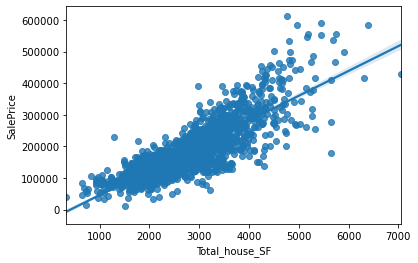

In [6]:
sns.regplot(x='Total_house_SF', y='SalePrice', data=train_data);

Looking through the list, we will also create the following feature and dropping the columns used to create these features.

1. Create feature for `house_full_bath` by adding the values from `Bsmt_Full_Bath`, `Full_Bath`, 
2. Create feature for `house_half_bath` by adding the values from `Bsmt_Half_Bath` and `Half_Bath`
3. Create feature for `house_age` by subtracting the values of `Year_Built` from `Yr_Sold`
4. Create feature for `remod_house_age` by subtracting the values of `Year_Remod/Add` from `Yr_Sold`

In [7]:
# Create feature for house_bath by adding the values from Bsmt_Full_Bath, Full_Bath, Bsmt_Half_Bath and Half_Bath
train_data['house_full_bath'] = train_data['Bsmt_Full_Bath'] + train_data['Full_Bath']
test_data['house_full_bath'] = test_data['Bsmt_Full_Bath'] + test_data['Full_Bath']

In [8]:
# Create feature for house_bath by adding the values from Bsmt_Full_Bath, Full_Bath, Bsmt_Half_Bath and Half_Bath
train_data['house_half_bath'] = train_data['Bsmt_Half_Bath'] + train_data['Half_Bath']
test_data['house_half_bath'] = test_data['Bsmt_Half_Bath'] + test_data['Half_Bath']

In [9]:
# Create feature for house_age by subtracting the values of Year_Built from Yr_Sold
train_data['house_age'] = train_data['Yr_Sold'] - train_data['Year_Built']
test_data['house_age'] = test_data['Yr_Sold'] - test_data['Year_Built']

In [10]:
# Create feature for remod_house_age by subtracting the values of Year_Remod/Add from Yr_Sold
train_data['remod_house_age'] = train_data['Yr_Sold'] - train_data['Year_Remod/Add']
test_data['remod_house_age'] = test_data['Yr_Sold'] - test_data['Year_Remod/Add']

In [11]:
# dropping the columns merged
train_data.drop(columns=[ 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath',
                         'Half_Bath', 'Year_Built', 'Year_Remod/Add', 'Yr_Sold'], inplace=True)

test_data.drop(columns=['Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath',
                         'Half_Bath', 'Year_Built', 'Year_Remod/Add', 'Yr_Sold'], inplace=True)

Let us take a look if these new features created has a linear relationship with `SalePrice`. Running the below codes shows that the features that we have created has a linear relationship with `SalePrice` by basing on the regression line drawn. 

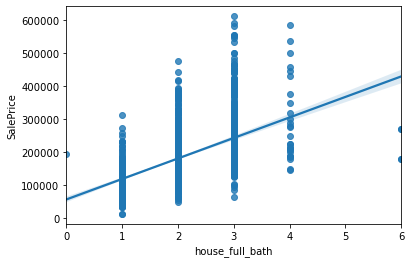

In [12]:
sns.regplot(x='house_full_bath', y='SalePrice', data=train_data);

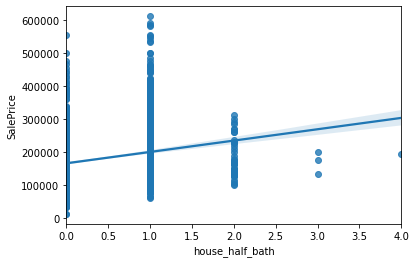

In [13]:
sns.regplot(x='house_half_bath', y='SalePrice', data=train_data);

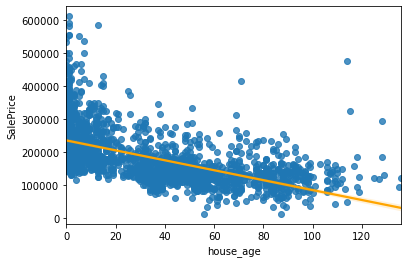

In [14]:
# the datapoints are clustered closely together, we will change the color of the regression line for clearer view
sns.regplot(x='house_age', y='SalePrice', data=train_data, line_kws={"color": "orange"});

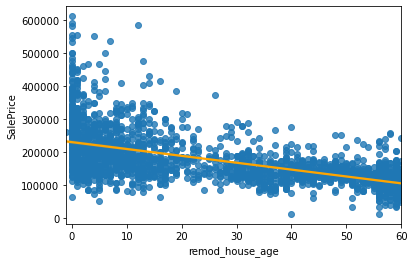

In [15]:
# the datapoints are clustered closely together, we will change the color of the regression line for clearer view
sns.regplot(x='remod_house_age', y='SalePrice', data=train_data, line_kws={"color": "orange"});

We check these new feature's correlation with the SalePrice within the `train_data`. We noticed that the correlation for these new features are generally higher (with the exception of `house_half_bath`) when compared to the remaining features. 

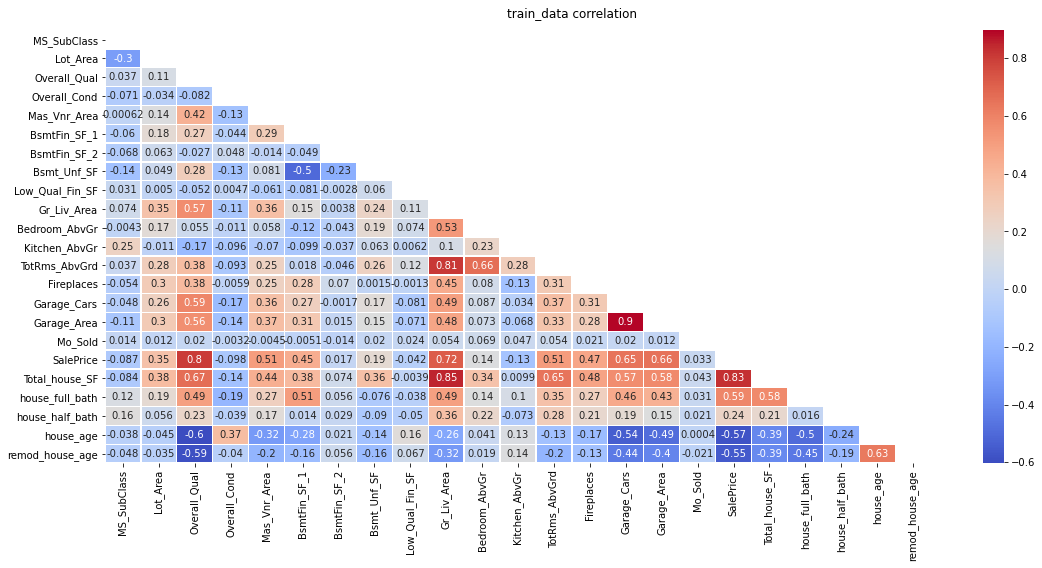

In [16]:
mask1 = np.zeros_like(train_data.iloc[:,2:].corr())
mask1[np.triu_indices_from(mask1)] = True

fig, ax = plt.subplots(figsize=(16,8))
fig.suptitle("train_data correlation")
    
sns.heatmap(data=train_data.iloc[:,2:].corr(),
            annot=True, linewidth = 0.3, mask=mask1, cmap='coolwarm')

plt.tight_layout()    #help to add more space/adjust the plots to best layout (like a print job, best fit)
    
plt.show()

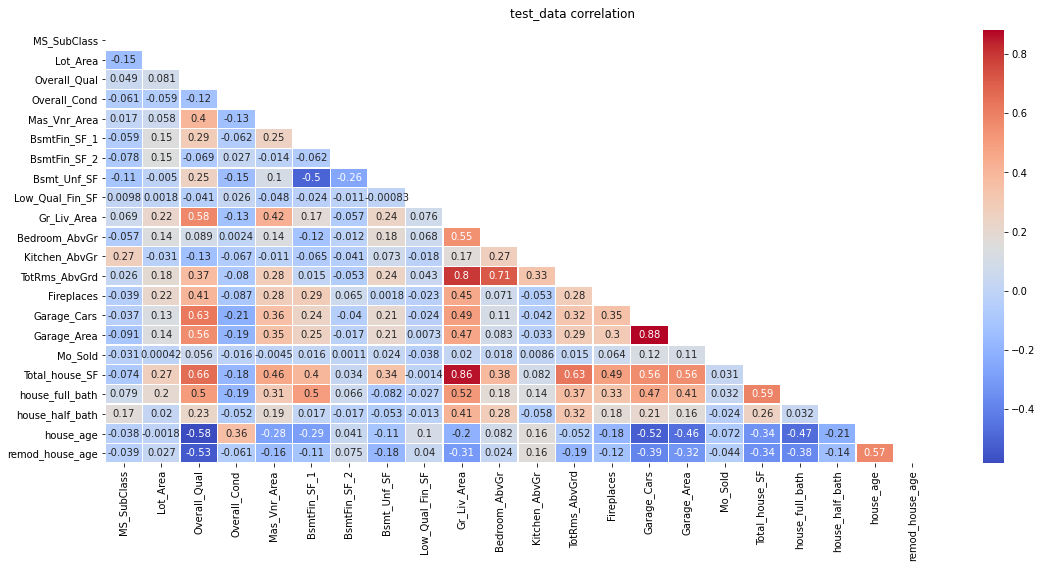

In [17]:
mask2 = np.zeros_like(test_data.iloc[:,2:].corr())
mask2[np.triu_indices_from(mask2)] = True

fig, ax = plt.subplots(figsize=(16,8))
fig.suptitle("test_data correlation")
    
sns.heatmap(data=test_data.iloc[:,2:].corr(), annot=True, linewidth = 0.3, mask=mask2, cmap='coolwarm')

plt.tight_layout()    #help to add more space/adjust the plots to best layout (like a print job, best fit)
    
plt.show()

Checking the correlations, we noticed that `Total_house_SF` and `Gr_Liv_Area`has a high correlation with each other which is expected as `Gr_Liv_Area` represents the square feet of living area that is above grade. 

Even though there is high correlation, we will not be removing any of the features as we see that both features has a high correlation with Sale Price as well. 

### One-hot encoding - categorical features

- To remove first column to prevent multicollinearity during one-hot encoding

In [18]:
print(f'Shape of train_data: {train_data.shape}')
print(f'Shape of test_data: {test_data.shape}')

Shape of train_data: (2047, 67)
Shape of test_data: (878, 66)


In [19]:
# dummify the train_data set
train = pd.get_dummies(train_data, drop_first=True)
print(f'Shape of train: {train.shape}')
train.head()

Shape of train: (2047, 248)


Id        PID  MS_SubClass  Lot_Area  Overall_Qual  Overall_Cond  \
0  109  533352170           60     13517             6             8   
1  544  531379050           60     11492             7             5   
2  153  535304180           20      7922             5             7   
3  318  916386060           60      9802             5             5   
4  255  906425045           50     14235             6             8   

   Mas_Vnr_Area  BsmtFin_SF_1  BsmtFin_SF_2  Bsmt_Unf_SF  ...  \
0         289.0         533.0           0.0        192.0  ...   
1         132.0         637.0           0.0        276.0  ...   
2           0.0         731.0           0.0        326.0  ...   
3           0.0           0.0           0.0        384.0  ...   
4           0.0           0.0           0.0        676.0  ...   

   Misc_Feature_Shed  Misc_Feature_TenC  Sale_Type_CWD  Sale_Type_Con  \
0                  0                  0              0              0   
1                  0                  0              0              0   
2                  0                  0              0              0   
3                  0                  0              0              0   
4                  0                  0              0              0   

   Sale_Type_ConLD  Sale_Type_ConLI  Sale_Type_ConLw  Sale_Type_New  \
0                0                0                0              0   
1                0                0                0              0   
2                0                0                0              0   
3                0                0                0              0   
4                0                0                0              0   

   Sale_Type_Oth  Sale_Type_WD   
0              0              1  
1              0              1  
2              0              1  
3              0              1  
4              0              1  

[5 rows x 248 columns]

In [20]:
# dummify the test_data set
test = pd.get_dummies(test_data, drop_first=True)
print(f'Shape of test: {test.shape}')
test.head()

Shape of test: (878, 230)


Id        PID  MS_SubClass  Lot_Area  Overall_Qual  Overall_Cond  \
0  2658  902301120          190      9142             6             8   
1  2718  905108090           90      9662             5             4   
2  2414  528218130           60     17104             7             5   
3  1989  902207150           30      8520             5             6   
4   625  535105100           20      9500             6             5   

   Mas_Vnr_Area  BsmtFin_SF_1  BsmtFin_SF_2  Bsmt_Unf_SF  ...  \
0           0.0             0             0         1020  ...   
1           0.0             0             0         1967  ...   
2           0.0           554             0          100  ...   
3           0.0             0             0          968  ...   
4         247.0           609             0          785  ...   

   Misc_Feature_Shed  Sale_Type_CWD  Sale_Type_Con  Sale_Type_ConLD  \
0                  0              0              0                0   
1                  0              0              0                0   
2                  0              0              0                0   
3                  0              0              0                0   
4                  0              0              0                0   

   Sale_Type_ConLI  Sale_Type_ConLw  Sale_Type_New  Sale_Type_Oth  \
0                0                0              0              0   
1                0                0              0              0   
2                0                0              1              0   
3                0                0              0              0   
4                0                0              0              0   

   Sale_Type_VWD  Sale_Type_WD   
0              0              1  
1              0              1  
2              0              0  
3              0              1  
4              0              1  

[5 rows x 230 columns]

In [21]:
# find and drop the columns that are present in only 1 data frame as this will affect our modelling later

# find columns in train but not in test
# note that we want to retain SalePrice column as our feature later. 
train_unique_cols = [i for i in train.columns if ((i not in test.columns) & (i != 'SalePrice'))]
print(f"Number of unique columns in train but not in test: {len(train_unique_cols)}")
print(f'Total number of columns for train: {train.shape[1]}')
print()

# find columns in test but not in train
test_unique_cols = [i for i in test.columns if (i not in train.columns)]
print(f"Number of unique columns in test but not in train: {len(test_unique_cols)}")
print(f'Total number of columns for test: {test.shape[1]}')
print()

# drop these columns
train.drop(columns=train_unique_cols, inplace=True)
test.drop(columns=test_unique_cols, inplace=True)

print(f'Number of columns after dropping for train: {train.shape[1]}')
print(f'Number of columns after dropping for test: {test.shape[1]}')

Number of unique columns in train but not in test: 26
Total number of columns for train: 248

Number of unique columns in test but not in train: 9
Total number of columns for test: 230

Number of columns after dropping for train: 222
Number of columns after dropping for test: 221


Train will have 1 additional feature than test which is the SalePrice that will be used as `y` during modelling.

## Modeling

1. Using the `train` data, set Target Variable (response vector) and Predictor Variables (feature matrix)
2. Split feature matirx and response vector into training and testing set for Machine Learning. 
3. Perform Machine Learning using LinearRegression, Ridge, Lasso and Elastic Net Regressions to see which model is the best performing of them all
4. Train and fit using the best model
5. Using `test` data, predict the SalePrice

### Prepare data for modeling
1. Identify response vector
2. Identify feature matrix
3. Train-test-split the training data, X and y

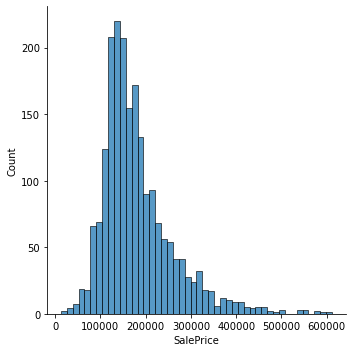

In [22]:
sns.displot(train['SalePrice']);

For our response vector, we can see that the data is skewed towards the left. We will apply log to the vector and this will allow the the distribution of the graph to be more normalised and allow better prediction. Examples of how this type of model work can be found [here](https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html).

0    11.779129
1    12.301383
2    11.599103
3    12.066811
4    11.838626
Name: SalePrice, dtype: float64


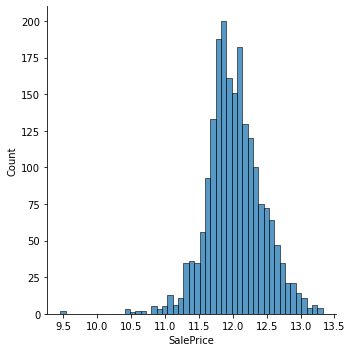

In [23]:
# set response vector
y = np.log(train['SalePrice'])
print(y[:5])
sns.displot(y);

In [24]:
# set feature matrix
features = [col for col in train.columns if col != 'SalePrice']
X = train[features].drop(columns=['Id', 'PID'])
X.head()

MS_SubClass  Lot_Area  Overall_Qual  Overall_Cond  Mas_Vnr_Area  \
0           60     13517             6             8         289.0   
1           60     11492             7             5         132.0   
2           20      7922             5             7           0.0   
3           60      9802             5             5           0.0   
4           50     14235             6             8           0.0   

   BsmtFin_SF_1  BsmtFin_SF_2  Bsmt_Unf_SF  Low_Qual_Fin_SF  Gr_Liv_Area  ...  \
0         533.0           0.0        192.0                0         1479  ...   
1         637.0           0.0        276.0                0         2122  ...   
2         731.0           0.0        326.0                0         1057  ...   
3           0.0           0.0        384.0                0         1444  ...   
4           0.0           0.0        676.0                0         1445  ...   

   Misc_Feature_Othr  Misc_Feature_Shed  Sale_Type_CWD  Sale_Type_Con  \
0                  0                  0              0              0   
1                  0                  0              0              0   
2                  0                  0              0              0   
3                  0                  0              0              0   
4                  0                  0              0              0   

   Sale_Type_ConLD  Sale_Type_ConLI  Sale_Type_ConLw  Sale_Type_New  \
0                0                0                0              0   
1                0                0                0              0   
2                0                0                0              0   
3                0                0                0              0   
4                0                0                0              0   

   Sale_Type_Oth  Sale_Type_WD   
0              0              1  
1              0              1  
2              0              1  
3              0              1  
4              0              1  

[5 rows x 219 columns]

In [25]:
# Model Prep : Train / Test Split
# set training set and testing set
# default split of test_size = 0.25, we will set test_szie = 0.2 for the training.
# random_state added to allow the split to be the same for re-runs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scale data

We will scale `X_train` and `X_test` using `StandardScaler`. 

In [26]:
# Model Prep : Scaling
ss = StandardScaler()

# fit X_train to ss
# transform X_train based on ss
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Hyperparameter Tuning
We will be performing hyperparamenter tuning for the below 3 models for the testing on the train data. 
1. Ridge Regression
2. Lasso Regression
3. Elastic Net Regression

In [27]:
# RidgeCV, alphas take on an Array of alpha values for regularization
ridge_cv = RidgeCV(alphas = np.logspace(0,5,100), scoring = 'r2', cv = 10)

# fit the model
ridge_cv.fit(X_train, y_train)

# find the optimal alpha and R2
print(f"Optimal Ridge Alpha: {ridge_cv.alpha_}")
print(f"Best Ridge R2: {ridge_cv.score(X_train, y_train)}")

Optimal Ridge Alpha: 265.6087782946687
Best Ridge R2: 0.9381459943592356


In [28]:
# LassoCV, n_alphas indicates number of alphas to use for the regularization
lasso_cv = LassoCV(n_alphas=100, cv=10)

# fit the model
lasso_cv.fit(X_train, y_train)

# find the optimal alpha and R2
print(f"Optimal Lasso Alpha: {lasso_cv.alpha_}")
print(f"Best Lasso R2: {lasso_cv.score(X_train, y_train)}")

Optimal Lasso Alpha: 0.003944679147430828
Best Lasso R2: 0.9322170231358837


In [29]:
# ElasticNetCV, with n_alphas and l1_raio to be identified
enet_model_cv = ElasticNetCV(n_alphas = 100, l1_ratio=list(np.linspace(0.01, 1, 10)), cv = 10)

# fit the model
enet_model_cv.fit(X_train, y_train)

# find the optimal alpha
print(f"Optimal Elastic Net Alpha: {enet_model_cv.alpha_}")

# find the optimal l1_ratio
print(f"Optimal Elastic Net L1_ratio: {enet_model_cv.l1_ratio_}")

# find the best R2
print(f"Best Elastic Net R2: {enet_model_cv.score(X_train, y_train)}")

Optimal Elastic Net Alpha: 0.03287232622859025
Optimal Elastic Net L1_ratio: 0.12
Best Elastic Net R2: 0.9321533336068104


With the optimal L1_ratio being 0.12, this suggests that Elastic Net is implementing both Lasso and Ridge Penalty.

### Cross Validation

4 models are tested on the train data.

1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Elastic Net Regression

As we are expecting to to have features that are not affecting sale price within our features matrix, we will use Linear Regression model as our baseline model as it is more simple to execute when compared to the other 3 models. 

In [30]:
# Instantiate the models with the optimised hyperparameter

# LinearRegression
lr = LinearRegression()

# Ridge Model with optimal alpha
ridge = Ridge(alpha = ridge_cv.alpha_)

# Lasso Model with optimal alpha
lasso = Lasso(alpha = lasso_cv.alpha_)

# Elastic Net Model with optimal alpha and L1 Ratio
enet_model = ElasticNet(alpha=enet_model_cv.alpha_, l1_ratio = enet_model_cv.l1_ratio_)

In [31]:
# R2 from each of the 10 fold validations
lr_scores = cross_val_score(lr, X_train, y_train, cv = 10)

# average R2 from across CV evaluations
lr_scores.mean()

-4.2884232037561947e+21

The $R^2$ score for Linear Regression, which is our baseline model, is negative, suggesting that the Linear Regression model is performing worse than a straight line ($y=1$).

In [32]:
# R2 from each of the 10 fold validations
ridge_scores = cross_val_score(ridge, X_train, y_train, cv = 10)

# average R2 from across CV evaluations
print(f"Average Ridge R2: {ridge_scores.mean()}")

Average Ridge R2: 0.9064702907718178


In [33]:
# R2 from each of the 10 fold validations
lasso_scores = cross_val_score(lasso, X_train, y_train, cv = 10)

# average R2 from across CV evaluations
print(f"Average Lasso R2: {lasso_scores.mean()}")

Average Lasso R2: 0.9085599620128259


In [34]:
# R2 from each of the 10 fold validations
enet_scores = cross_val_score(enet_model, X_train, y_train, cv = 10)

# average R2 from across CV evaluations
print(f"Average Elastic Net R2: {enet_scores.mean()}")

Average Elastic Net R2: 0.9092243156982232


From above, we will rank the model's performance, with all R2 values rounded to 4dp.

|Rank| Model | R2 (4dp) | Difference with best model (4dp)|
|-|-|-|-|
|1| Elastic Net Regression | 0.9092 | 0 |
|2| Lasso Regression | 0.9085 | 0.0007 |
|3| Ridge Regression | 0.9065 | 0.0028 |
|Baseline| Linear Regression | negative |  |

### Model Evaluation

We will fit the model using X_train and y_train and test the model using X_test, y_test. 
We will use R2, MSE and RMSE to see the performance of our models. 

Running the below codes, we get the following table

| Model | Data | R2 | MSE | RMSE |
|-|-|-|-|-|
| Linear Regression - Baseline | X_train, y_train | 0.9460404354032839 | 0.009185086176887788 | 0.09583885525655964 |
| Linear Regression - Baseline | X_test, y_test | 0.8707391653364231 | 0.021094568508930166 | 0.14523969329673678 |
| Ridge Regression | X_train, y_train | 0.9381459943592356 | 0.01052889096571211 | 0.10261038429765337 |
| Ridge Regression | X_test, y_test | 0.8750218246581715 | 0.02039566500348586 | 0.1428133922413646 |
| Lasso Regression | X_train, y_train | 0.9322170231358837 | 0.011538130236521418 | 0.10741568896823879 |
| Lasso Regression | X_test, y_test | 0.8782678931676882 | 0.01986592670543992 | 0.14094653846561794 |
| Elastic Net Regression | X_train, y_train | 0.9321533336068104 | 0.011548971573316344 | 0.10746614152055681 |
| Elastic Net Regression | X_test, y_test | 0.878272287782094 | 0.01986520953155739 | 0.14094399430822652 |

There might be overfitting of the model on the training set as there is about a 0.05 to 0.1 difference between the R2 Score for the training and the testing data on the different models. 

We see that both Lasso Regression and Elastic Net Regression has very closed RMSE score and are the closest to zero for both training and testing data. As such, we will use the both the Lasso Regression model and Elastic Net model to predict the `SalePrice` of `test` data for comparison in Kaggle.

In [35]:
# fit the models before looking at metrics
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
enet_model.fit(X_train, y_train)

ElasticNet(alpha=0.03287232622859025, l1_ratio=0.12)

In [36]:
# let us look at the MSE, RMSE and R2 scores
print("On training data (X_train, y_train)".center(30, "="))
print("R2 scores".center(30, "="))
print(f"Linear Regression : {lr.score(X_train, y_train)}")
print(f"Ridge : {ridge.score(X_train, y_train)}")
print(f"Lasso : {lasso.score(X_train, y_train)}")
print(f"ElasticNet : {enet_model.score(X_train, y_train)}")
print()
print("MSE".center(30, "="))
print(f"Linear Regression : {np.mean((lr.predict(X_train) - y_train)**2)}")
print(f"Ridge : {np.mean((ridge.predict(X_train) - y_train)**2)}")
print(f"Lasso : {np.mean((lasso.predict(X_train) - y_train)**2)}")
print(f"ElasticNet : {np.mean((enet_model.predict(X_train) - y_train)**2)}")
print()
print("RMSE".center(30, "="))
print(f"Linear Regression : {(np.mean((lr.predict(X_train) - y_train)**2))**0.5}")
print(f"Ridge : {(np.mean((ridge.predict(X_train) - y_train)**2))**0.5}")
print(f"Lasso : {(np.mean((lasso.predict(X_train) - y_train)**2))**0.5}")
print(f"ElasticNet : {(np.mean((enet_model.predict(X_train) - y_train)**2))**0.5}")
print()

On training data (X_train, y_train)
==========R2 scores===========
Linear Regression : 0.9460404354032839
Ridge : 0.9381459943592356
Lasso : 0.9322170231358837
ElasticNet : 0.9321533336068104

=============MSE==============
Linear Regression : 0.009185086176887788
Ridge : 0.01052889096571211
Lasso : 0.011538130236521418
ElasticNet : 0.011548971573316344

=============RMSE=============
Linear Regression : 0.09583885525655964
Ridge : 0.10261038429765337
Lasso : 0.10741568896823879
ElasticNet : 0.10746614152055681



In [37]:
# let us look at the MSE, RMSE and R2 scores
print("On testing data (X_test, y_test)".center(30, "="))
print("R2 scores".center(30, "="))
print(f"Linear Regression : {lr.score(X_test, y_test)}")
print(f"Ridge : {ridge.score(X_test, y_test)}")
print(f"Lasso : {lasso.score(X_test, y_test)}")
print(f"ElasticNet : {enet_model.score(X_test, y_test)}")
print()
print("MSE".center(30, "="))
print(f"Linear Regression : {np.mean((lr.predict(X_test) - y_test)**2)}")
print(f"Ridge : {np.mean((ridge.predict(X_test) - y_test)**2)}")
print(f"Lasso : {np.mean((lasso.predict(X_test) - y_test)**2)}")
print(f"ElasticNet : {np.mean((enet_model.predict(X_test) - y_test)**2)}")
print()
print("RMSE".center(30, "="))
print(f"Linear Regression : {(np.mean((lr.predict(X_test) - y_test)**2))**0.5}")
print(f"Ridge : {(np.mean((ridge.predict(X_test) - y_test)**2))**0.5}")
print(f"Lasso : {(np.mean((lasso.predict(X_test) - y_test)**2))**0.5}")
print(f"ElasticNet : {(np.mean((enet_model.predict(X_test) - y_test)**2))**0.5}")
print()

On testing data (X_test, y_test)
==========R2 scores===========
Linear Regression : 0.8707391653364231
Ridge : 0.8750218246581715
Lasso : 0.8782678931676882
ElasticNet : 0.878272287782094

=============MSE==============
Linear Regression : 0.021094568508930166
Ridge : 0.02039566500348586
Lasso : 0.01986592670543992
ElasticNet : 0.01986520953155739

=============RMSE=============
Linear Regression : 0.14523969329673678
Ridge : 0.1428133922413646
Lasso : 0.14094653846561794
ElasticNet : 0.14094399430822652



## Conclusion

### Kaggle Submission

We will use both the Lasso and the Elastic Net model to predict the data and compare the Kaggle Score. 

In [38]:
# scale the test data
fin_test = ss.transform(test.drop(columns=['Id','PID']))

#### Lasso Model

In [39]:
# creating Kaggle submission 
# predicting SalePrice of test data
kaggle_lasso = pd.DataFrame()
kaggle_lasso['Id'] = test['Id']
# during prediction, the model will predict y which is log(SalePrice), hence will will need to exp back to get SalePrice
kaggle_lasso['SalePrice'] = np.exp(lasso.predict(fin_test))
kaggle_lasso

Id      SalePrice
0    2658  129365.583473
1    2718  164342.546129
2    2414  215699.637868
3    1989  106378.806589
4     625  169954.821940
..    ...            ...
873  1662  192264.752408
874  1234  215413.941129
875  1373  127007.845733
876  1672  116871.107599
877  1939  122961.151959

[878 rows x 2 columns]

In [40]:
# create kaggle_submission folder if it does not exist in current folder
if not os.path.exists('../kaggle_submission'):
    os.makedirs('../kaggle_submission')
    
# Export the csv file into kaggle_submission folder
kaggle_lasso.to_csv('../kaggle_submission/kaggle_lasso_submission.csv', index=False)

#### Elastic Net Model

In [41]:
# creating Kaggle submission 
# predicting SalePrice of test data
kaggle_enet = pd.DataFrame()
kaggle_enet['Id'] = test['Id']
# during prediction, the model will predict y which is log(SalePrice), hence will will need to exp back to get SalePrice
kaggle_enet['SalePrice'] = np.exp(enet_model.predict(fin_test))
kaggle_enet

Id      SalePrice
0    2658  125832.456803
1    2718  164475.610969
2    2414  217385.830448
3    1989  107638.194350
4     625  170501.707381
..    ...            ...
873  1662  191786.167098
874  1234  217088.334675
875  1373  126953.964340
876  1672  117491.005828
877  1939  123857.613303

[878 rows x 2 columns]

In [42]:
# Export the csv file into kaggle_submission folder
kaggle_enet.to_csv('../kaggle_submission/kaggle_enet_submission.csv', index=False)

#### Kaggle Submission Score

Snapshot from kaggle:

<img src='./images/kaggle_submission.png' width=800px />

### Optimal Model

#### Kaggle Submission Performance

Referring to our kaggle submissions, we see that Elastic Net model had a better score of 23734.

#### Residual plots

Let us take a compare residual for Elastic Net Regression model and Lasso Regression model and the 

Running the code below shows that the two models residual have a linear relationship with each other. 

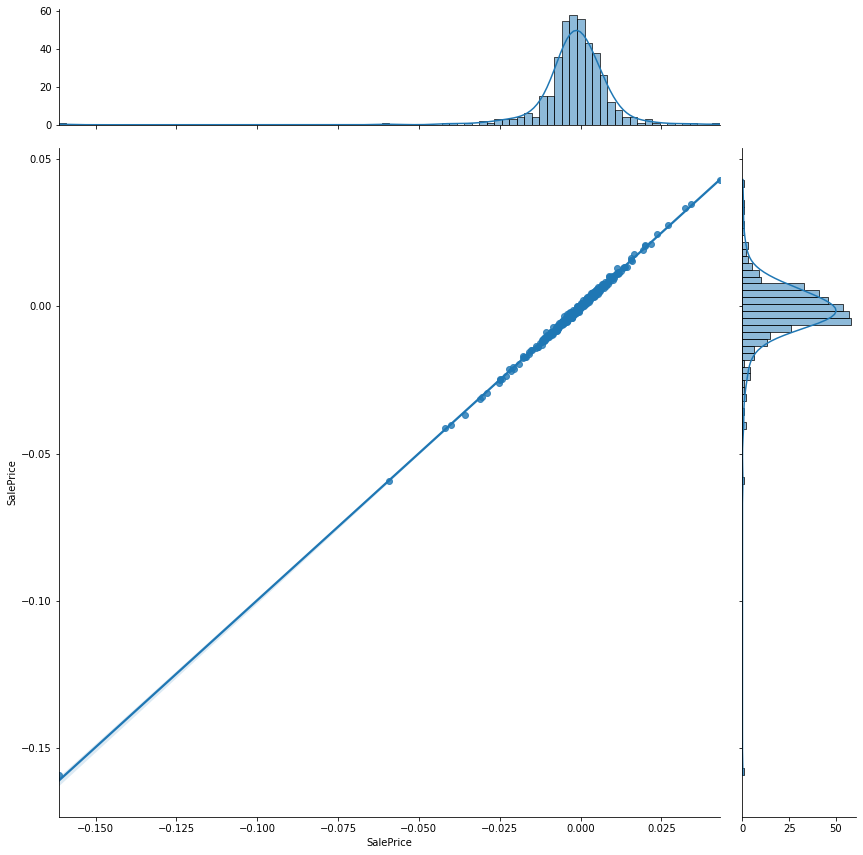

In [43]:
enet_resid = np.log(y_test) - np.log(enet_model.predict(X_test))
lasso_resid = np.log(y_test) - np.log(lasso.predict(X_test))

sns.jointplot(x = enet_resid, y = lasso_resid, kind='reg', marginal_ticks=True, height=12);

#### Conclusion of model

As previously concluded, Lasso and Elastic Net model have similar performance metrics. 

| Model | Data | RMSE for log(SalePrice)| RMSE for SalePrice |
|-|-|-|-|
| Lasso Regression | X_train, y_train | 0.10741568896823879 | 19725.735394981446 |
| Lasso Regression | X_test, y_test |  0.14094653846561794 | 19694.806148270756 |
| Elastic Net Regression | X_train, y_train | 0.10746614152055681 | 19190.636599824727 |
| Elastic Net Regression | X_test, y_test |  0.14094399430822652 | 19250.63157811811 |

When uploaded into kaggle, we notice that elastic net had a much better performance (difference of more than 400) even though the difference in our training and testing data were very close to each other (difference within 100). 

Recalling our problem statement, we were expected to develop a model that predicts the housing sale price in Ames, Iowa. <br>
Our conclusion is the __Elastic Net model__ is the better model at prediciting the Sale Price.

In [44]:
# let us look at the RMSE
print("On training data (X_train, y_train)".center(30, "="))
print("RMSE (SalePrice)".center(30, "="))
print(f"Lasso : {(np.mean((np.exp(lasso.predict(X_train)) - np.exp(y_train))**2))**0.5}")
print(f"ElasticNet : {(np.mean((np.exp(enet_model.predict(X_train)) - np.exp(y_train))**2))**0.5}")
print()
print("On testing data (X_test, y_test)".center(30, "="))
print("RMSE (SalePrice)".center(30, "="))
print(f"Lasso : {(np.mean((np.exp(lasso.predict(X_test)) - np.exp(y_test))**2))**0.5}")
print(f"ElasticNet : {(np.mean((np.exp(enet_model.predict(X_test)) - np.exp(y_test))**2))**0.5}")
print()

On training data (X_train, y_train)
=======RMSE (SalePrice)=======
Lasso : 19725.735394981446
ElasticNet : 19694.806148270756

On testing data (X_test, y_test)
=======RMSE (SalePrice)=======
Lasso : 19190.636599824727
ElasticNet : 19250.63157811811



## Recommendation

Referring back to our problem statement, on top of creating a model to predict Sale Price, we are to identify the top 3 features that will increase the sale price and identify 3 features that will lead to a decrease in the sale price.

To tackle this problem, let's take a look at the coefficients of the model. 

In [45]:
pd.set_option('display.max_rows', None)
enet_coef = pd.DataFrame({'feature': list(X.columns), 'Coef': list(enet_model.coef_),
                          'abs(Coef)':[np.abs(i) for i in list(enet_model.coef_)], 
                          'exp(Coef)': [np.exp(i) for i in list(enet_model.coef_)]
                         }).sort_values(by='abs(Coef)', ascending=False)

enet_coef['Percentage_SalePrice'] = (enet_coef['exp(Coef)'] - 1)*100

enet_coef

feature      Coef  abs(Coef)  exp(Coef)  \
2            Overall_Qual  0.090259   0.090259   1.094458   
17         Total_house_SF  0.083487   0.083487   1.087071   
9             Gr_Liv_Area  0.065542   0.065542   1.067738   
20              house_age -0.050157   0.050157   0.951080   
3            Overall_Cond  0.034509   0.034509   1.035112   
5            BsmtFin_SF_1  0.030360   0.030360   1.030825   
1                Lot_Area  0.025261   0.025261   1.025583   
129         Exter_Cond_Po -0.021798   0.021798   0.978438   
15            Garage_Area  0.019165   0.019165   1.019350   
21        remod_house_age -0.017734   0.017734   0.982422   
201         Paved_Drive_Y  0.017593   0.017593   1.017749   
48   Neighborhood_Crawfor  0.013841   0.013841   1.013937   
216         Sale_Type_New  0.013040   0.013040   1.013125   
18        house_full_bath  0.012980   0.012980   1.013065   
59   Neighborhood_NridgHt  0.012741   0.012741   1.012822   
161          Heating_Grav -0.012677   0.012677   0.987403   
164         Heating_QC_TA -0.012383   0.012383   0.987694   
165         Central_Air_Y  0.012127   0.012127   1.012201   
13             Fireplaces  0.011983   0.011983   1.012055   
52    Neighborhood_IDOTRR -0.011500   0.011500   0.988566   
25           MS_Zoning_RL  0.011174   0.011174   1.011237   
144      Bsmt_Exposure_Gd  0.011090   0.011090   1.011152   
12          TotRms_AbvGrd  0.010987   0.010987   1.011047   
132      Foundation_PConc  0.010519   0.010519   1.010575   
98   Exterior_1st_BrkComm -0.010497   0.010497   0.989558   
53   Neighborhood_MeadowV -0.010310   0.010310   0.989743   
69       Condition_1_Norm  0.009810   0.009810   1.009858   
92     Roof_Style_Mansard -0.009097   0.009097   0.990944   
80        Bldg_Type_Twnhs -0.008910   0.008910   0.991129   
99   Exterior_1st_BrkFace  0.008630   0.008630   1.008667   
176        Functional_Typ  0.008425   0.008425   1.008461   
22           MS_Zoning_FV  0.008362   0.008362   1.008397   
124         Exter_Qual_Fa -0.008157   0.008157   0.991876   
11          Kitchen_AbvGr -0.008007   0.008007   0.992025   
198        Garage_Cond_Po -0.007452   0.007452   0.992575   
195        Garage_Cond_Fa -0.007283   0.007283   0.992744   
65   Neighborhood_StoneBr  0.007117   0.007117   1.007142   
49   Neighborhood_Edwards -0.006538   0.006538   0.993483   
14            Garage_Cars  0.006461   0.006461   1.006482   
179       Fireplace_Qu_NA -0.005943   0.005943   0.994075   
172       Functional_Maj2 -0.005268   0.005268   0.994746   
79       Bldg_Type_Duplex -0.005127   0.005127   0.994886   
126         Exter_Qual_TA -0.005068   0.005068   0.994945   
149    BsmtFin_Type_1_GLQ  0.004985   0.004985   1.004998   
64   Neighborhood_Somerst  0.004725   0.004725   1.004736   
123    Mas_Vnr_Type_Stone  0.004179   0.004179   1.004188   
147      Bsmt_Exposure_No -0.004081   0.004081   0.995927   
44    Neighborhood_BrDale -0.003942   0.003942   0.996066   
4            Mas_Vnr_Area  0.003583   0.003583   1.003589   
71       Condition_1_PosN  0.003578   0.003578   1.003584   
70       Condition_1_PosA  0.003464   0.003464   1.003470   
178       Fireplace_Qu_Gd  0.003439   0.003439   1.003444   
162         Heating_QC_Fa -0.002713   0.002713   0.997291   
185   Garage_Type_CarPort -0.002493   0.002493   0.997510   
130         Exter_Cond_TA  0.002410   0.002410   1.002412   
182    Garage_Type_Attchd  0.002358   0.002358   1.002361   
171       Kitchen_Qual_TA -0.002302   0.002302   0.997700   
169       Kitchen_Qual_Fa -0.002140   0.002140   0.997862   
60   Neighborhood_OldTown -0.002032   0.002032   0.997971   
33       Land_Contour_HLS  0.001828   0.001828   1.001830   
72       Condition_1_RRAe -0.001802   0.001802   0.998200   
217         Sale_Type_Oth  0.001750   0.001750   1.001752   
108  Exterior_2nd_AsphShn  0.001417   0.001417   1.001418   
196        Garage_Cond_Gd  0.001417   0.001417   1.001418   
0             MS_SubClass -0.001376   0.001376   0.99

In [46]:
# reset the view back to default
pd.set_option('display.max_rows', 60)

The model had 219 coefficients.
The model produced 75 non-zero coefficients.


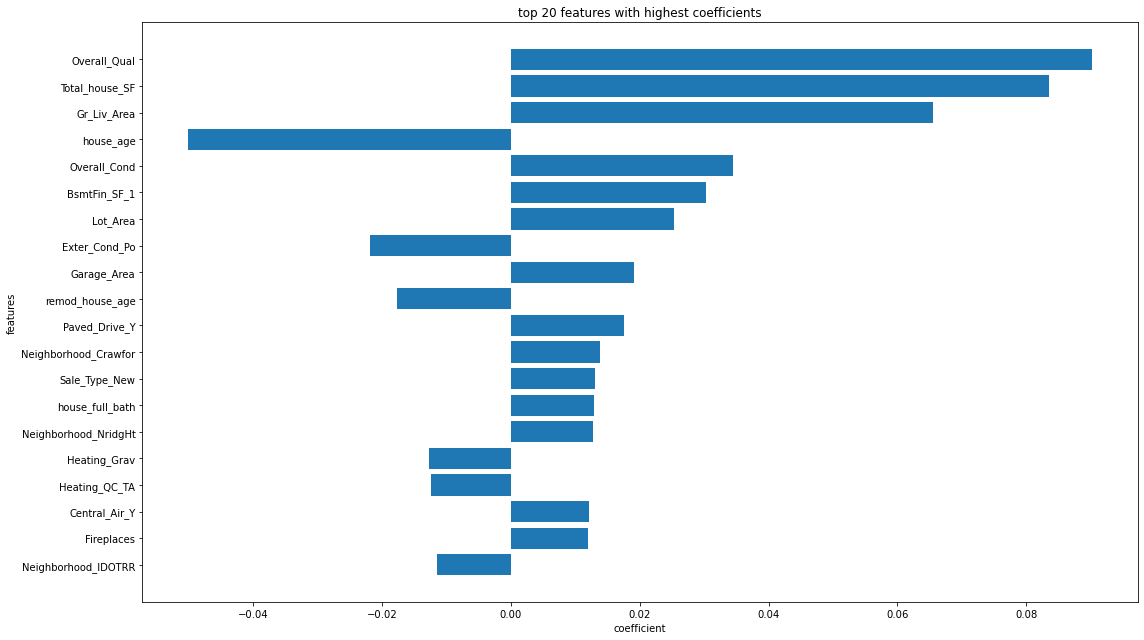

In [47]:
# get non-zero coefficients
print(f'The model had {enet_coef.shape[0]} coefficients.')
print(f'The model produced {enet_coef[enet_coef["Coef"] != 0].shape[0]} non-zero coefficients.')

# plot graph for top 20 coefficients
plt.figure(figsize=(16,9))
plt.barh(enet_coef['feature'].head(20), enet_coef['Coef'].head(20), label='Ave Survival Rate of pclass')
plt.title('top 20 features with highest coefficients')
plt.xlabel('coefficient')
plt.ylabel('features')
plt.tight_layout()
plt.gca().invert_yaxis()  # inverse the y-axis for better presentation (top highest)
plt.show()

From the above plot, we see that `Overall_Qual`, `Total_house_SF`, `Gr_Liv_Area`, `Overall_Cond` and `BsmtFin_SF_1` ranks top 5 in terms of increaing the Sale Price. 

| 	    feature	 | 	Coef	 | 	exp(Coef)	 | 	Percentage_SalePrice	 |
|-|-|-|-|
| 	Overall_Qual	 | 	0.090259	 | 	1.094458	 | 	9.445785	 |
| 	Total_house_SF	 | 	0.083487	 | 	1.087071	 | 	8.707079	 |
| 	Gr_Liv_Area	 | 	0.065542	 | 	1.067738	 | 	6.773757	 |
| 	Overall_Cond	 | 	0.034509	 | 	1.035112	 | 	3.511181	 |
| 	BsmtFin_SF_1	 | 	0.03036	 | 	1.030825	 | 	3.082531	 |

We also see that `house_age`, `Exter_Cond_Po`, `remod_house_age`, `Heating_Grav` and `Heating_QC_TA` ranks top 5 in terms of decreasing the housing price.

| 	    feature	 | 	Coef	 | 	exp(Coef)	 | 	Percentage_SalePrice	 |
|-|-|-|-|
| 	house_age	 | 	-0.050157	 | 	0.95108	 | 	-4.892013	 |
| 	Exter_Cond_Po	 | 	-0.021798	 | 	0.978438	 | 	-2.156218	 |
| 	remod_house_age	 | 	-0.017734	 | 	0.982422	 | 	-1.757775	 |
| 	Heating_Grav	 | 	-0.012677	 | 	0.987403	 | 	-1.259712	 |
| 	Heating_QC_TA	 | 	-0.012383	 | 	0.987694	 | 	-1.230635	 |

The column `Percentage_SalePrice` shows a one unit increase in the feature will lead to the percentage reflected change in house Sale Price. Taking an example from both categories, we see 
1. for a unit increase in `Overall_Qual` will have a estimated of 9.45% __increase__ in the house Sale Price; and
2. for a unit increase in `house_age`, it will lead to an estimated of 4.89% __decrease__ in the house Sale Price. 

We also note that the model has taken into consideration of 75 out of 219 features.

In [48]:
# view just the top 5 features of increasing / decreasing sales price
enet_coef[(enet_coef['feature'] == 'Overall_Qual') | (enet_coef['feature'] == 'Total_house_SF') |
          (enet_coef['feature'] == 'Gr_Liv_Area') | (enet_coef['feature'] == 'Overall_Cond') |
          (enet_coef['feature'] == 'BsmtFin_SF_1') | (enet_coef['feature'] == 'house_age') |
          (enet_coef['feature'] == 'Exter_Cond_Po') | (enet_coef['feature'] == 'remod_house_age') |
          (enet_coef['feature'] == 'Heating_Grav') | (enet_coef['feature'] == 'Heating_QC_TA')
         ]

feature      Coef  abs(Coef)  exp(Coef)  Percentage_SalePrice
2       Overall_Qual  0.090259   0.090259   1.094458              9.445785
17    Total_house_SF  0.083487   0.083487   1.087071              8.707079
9        Gr_Liv_Area  0.065542   0.065542   1.067738              6.773757
20         house_age -0.050157   0.050157   0.951080             -4.892013
3       Overall_Cond  0.034509   0.034509   1.035112              3.511181
5       BsmtFin_SF_1  0.030360   0.030360   1.030825              3.082531
129    Exter_Cond_Po -0.021798   0.021798   0.978438             -2.156218
21   remod_house_age -0.017734   0.017734   0.982422             -1.757775
161     Heating_Grav -0.012677   0.012677   0.987403             -1.259712
164    Heating_QC_TA -0.012383   0.012383   0.987694             -1.230635

### Further recommendations
Based on our findings above, to increase Sale Price, we will recommend taking the following actions

| 	    feature	 | 	Description	 | 	Percentage_SalePrice	 | 	Action	 |
|-|-|-|-|
| 	Overall_Qual	 | 	Rates the overall material and finish of the house	 | 	9.445785	 | 	Repair and painting works	 |
| 	Gr_Liv_Area	 | 	Above grade (ground) living area square feet	 | 	6.773757	 | 	Repair or renovation works	 |
| 	BsmtFin_SF_1	 | 	Type 1 finished square feet	 | 	3.082531	 | 	renovation works	 |

### Ways to improve model

To further improve the model developed, we can take the following steps:
1. Improve the way outlier is identified
2. Identify more features that should be considered together and not seperately based on response on ground